# RUSTOM ALE MAGAR 

# Car Price Prediction Project
## Task 1: Data Exploration and Preprocessing

This notebook covers the initial exploration and preprocessing of the car prices dataset, including data inspection, cleaning, feature engineering, and exploratory data analysis (EDA).


In [1]:
##import libraries

# import pandas for data loading, manipulation, and analysis
import pandas as pd 

# import numpy for numerical operations and array handling
import numpy as np

# import matplotlib for basic data visualisation
import matplotlib.pyplot as plt

# import seaborn for advanced and statistical visualisations
import seaborn as sns

# set default plotting style to ensure consistent visual appearance
plt.style.use('default')

## Load data

In [2]:
# 1. load the dataset# reads csv file
df = pd.read_csv("CAR Price Dataset.csv")

# displays the first 5 rows of the dataframe
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [3]:
# dataset overview

# returns the shape of the DataFrame as (rows, columns)
df.shape

(4340, 8)

In [4]:
# provides a consise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4333 non-null   float64
 3   km_driven      4335 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4334 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [5]:
# generates descriptive statistics for numerical columns
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.333000e+03,4335.000000
mean,2013.090783,5.041582e+05,66230.120877
std,4.215344,5.789089e+05,46618.590991
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## Basic cleaning

In [6]:
# Missing value analysis

# checks for missing (null/NaN) values in the DataFrame df
# df.isnull() - returns df of the same shape with True for missing values and False for others
# .sum() - sums the True values for each column, giving the total number of missing values per column

df.isnull().sum()

name             0
year             0
selling_price    7
km_driven        5
fuel             0
seller_type      6
transmission     0
owner            0
dtype: int64

In [7]:
df = df.dropna(subset = ["selling_price"])     #7 rows with missing target values(selling_price) are removed

In [8]:
df["km_driven"] = pd.to_numeric(df["km_driven"], errors = "coerce")
df["km_driven"].fillna(df["km_driven"].median(), inplace = True)

In [9]:
df["seller_type"].fillna(df["seller_type"].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
df.shape    

(4333, 8)

In [12]:
# Duplicates

duplicate_count = df.duplicated().sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 754


In [13]:
#Removing the duplicates

df = df.drop_duplicates() 

duplicate_count = df.duplicated().sum()
print('Number of duplicate rows after dropping:', duplicate_count)

Number of duplicate rows after dropping: 0


In [14]:
df.shape

(3579, 8)

In [15]:
# Identify feature types

# selects all columns in the datafrme df that have numeric data types (integers or floats)
numeric_features = df.select_dtypes(include=['int64','float64']).columns

# selects all columns with object data type (usually strings / categorical data)
categorical_features = df.select_dtypes(include=['object']).columns

# this matters because model cannot directly handle strings

## Conduct EDA (plots, distributions, correlations) to identify trends, correlations, and outliers

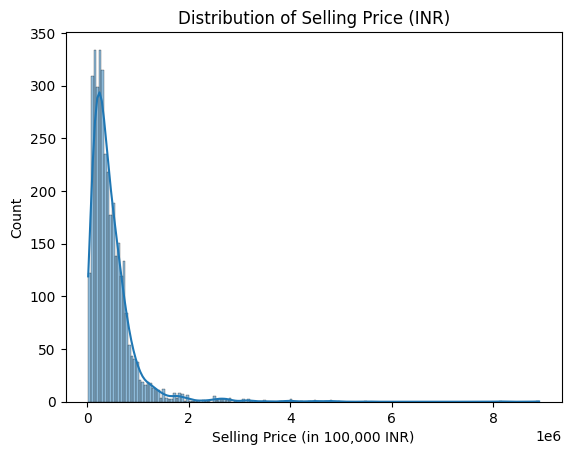

In [16]:
# Target variable analysis (critical)

# creates a histogram of the 'Selling_Price' column from the dataframe df
# bins=30 - divides the data into 30 equal intervals (bars)
sns.histplot(df['selling_price'], bins='fd', kde=True)   # fd = freedman-Diaconis rule for bin selection

plt.title('Distribution of Selling Price (INR)')
plt.xlabel('Selling Price (in 100,000 INR)')
plt.ylabel('Count')

# save the figure
plt.savefig('Distribution_of_selling_price.png', dpi=300, bbox_inches='tight')

# displays the plot
plt.show()

In [17]:
# count - number of observations in each bin
# each bar represent number of cars in that price range

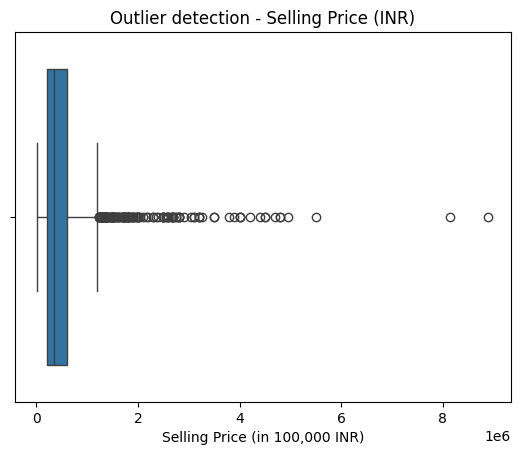

In [18]:
# Outlier detection

# creates a box plot (AKA whisker plot) for the 'selling_price' column
# show the distribution of data including: median, quartiles, whiskers(range), outliers (point outside the whisker)
sns.boxplot(x=df['selling_price'])
plt.title('Outlier detection - Selling Price (INR)')
plt.xlabel('Selling Price (in 100,000 INR)')


# saves the plot
plt.savefig('boxplot_of_selling_price.png', dpi=300, bbox_inches='tight')

plt.show()

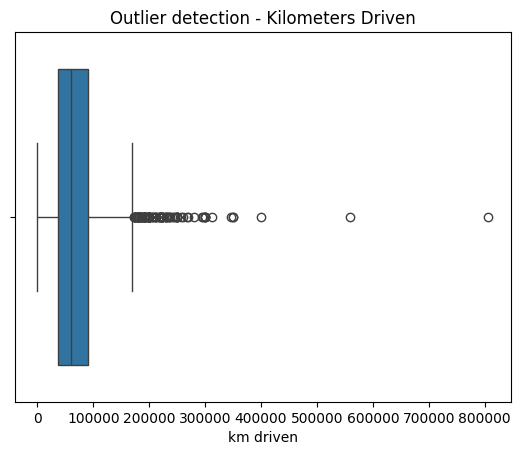

In [19]:
# create box plot for the kilometer driven
sns.boxplot(x=df['km_driven'])
plt.title('Outlier detection - Kilometers Driven')
plt.xlabel('km driven')


plt.show()

In [20]:
df['km_driven'].describe()

count      3579.000000
mean      69236.172115
std       47515.890275
min           1.000000
25%       36000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

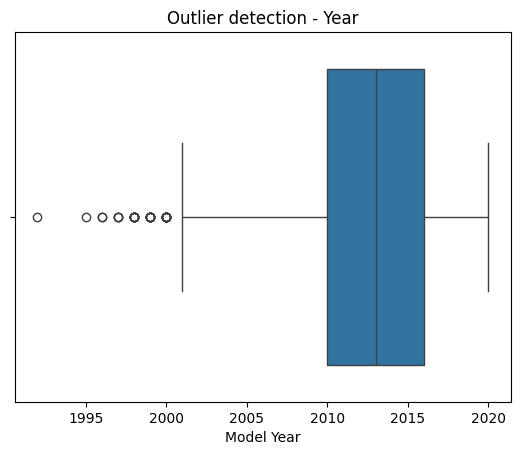

In [21]:
# creates boxplot for year
sns.boxplot(x=df['year'])

plt.title('Outlier detection - Year')
plt.xlabel('Model Year')


plt.show()

In [22]:
# inspect column data types
df.dtypes

name              object
year               int64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

In [23]:
# view dataset columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [24]:
# inspect categorical value distribution
for col in ['fuel','seller_type','transmission','owner']:
    print(df[col].value_counts())

fuel
Diesel      1800
Petrol      1719
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64
seller_type
Individual          2834
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64
transmission
Manual       3267
Automatic     312
Name: count, dtype: int64
owner
First Owner             2220
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64


In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [26]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

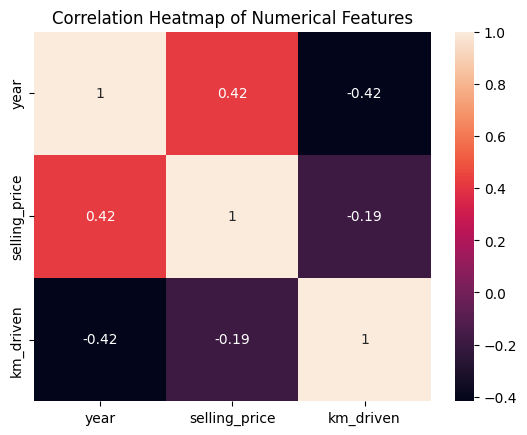

In [27]:
# Relationship Analysis (EDA)

# Correlation Heatmap (Numerical Feature)

# select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['int64','float64'])

# plot a correlation heatmap to examine relationships between numerical features
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Features')

# saves plot
plt.savefig('correlation_heatmap_of_numeric_features', dpi=300, bbox_inches='tight')

plt.show()

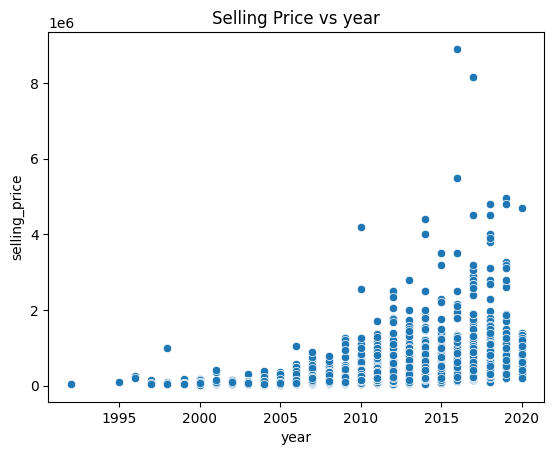

In [28]:
# Scatter Plots

# Selling Price vs Year
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs year')

plt.savefig('scatter_plot_selling_price_vs_year', dpi=300, bbox_inches='tight')
plt.show()


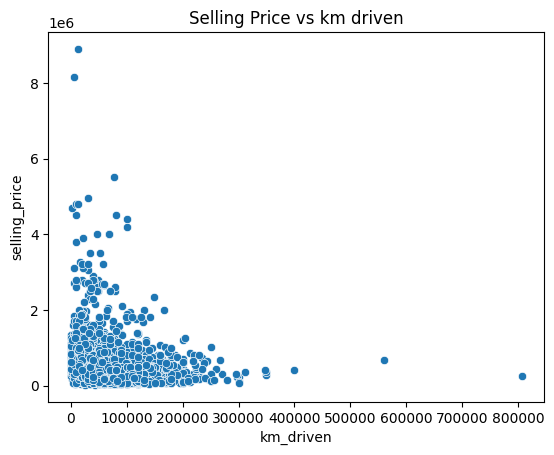

In [29]:
# Selling Price vs Km Driven
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs km driven')

plt.savefig('scatter_plot_selling_price_km_driven', dpi=300, bbox_inches='tight')
plt.show()

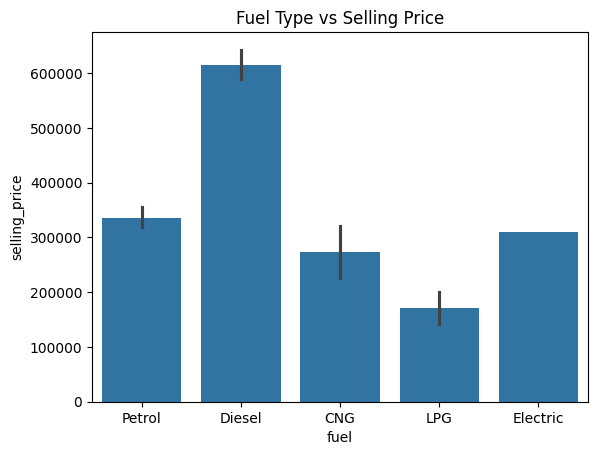

In [30]:
# Bar Plots (Categorical vs Target)

# Fuel Type vs Selling Price
sns.barplot(x='fuel', y='selling_price', data=df)
plt.title('Fuel Type vs Selling Price')

plt.savefig('bar_charts_fuel_type_vs_selling_price', dpi=300, bbox_inches='tight')
plt.show()

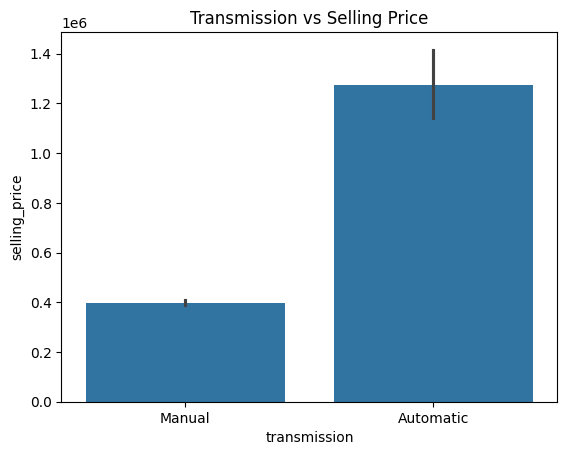

In [31]:
# Transmission vs Selling Price
sns.barplot(x='transmission', y='selling_price', data=df)
plt.title('Transmission vs Selling Price')

plt.savefig('bar_charts_transmission_vs_selling_price', dpi=300, bbox_inches='tight')
plt.show()

## feature engineering

In [32]:
# feature engineering

# car age calculation
df['Car_Age'] = 2025 - df['year']

# extract brand from car name
df['Brand'] = df['name'].apply(lambda x:x.split()[0])

# log transformation of Km_driven
df['Log_km_driven'] = np.log1p(df['km_driven'])

In [33]:
# display first few rows to verify data loading and structure
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,Brand,Log_km_driven
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner,18,Maruti,11.156265
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner,18,Maruti,10.819798
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner,13,Hyundai,11.512935
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner,8,Datsun,10.736418
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,11,Honda,11.856522


In [34]:
# Preprocessing Strategy (Planning Stage)

'''
Decisions defined
1. Encoding:
    One-Hot Encoding was selected for categorical variables to convert them into numerical format without introducing ordinal relationships.

2. Scaling:
    StandardScaler was chosen to standardise numerical features, ensuring equal feature contribution and improving the performance of distance-based and linear models.

3. Train-Test Split:
    The dataset was divided into 80% training and 20% testing subsets to allow robust model evaluation on unseen data.
    
'''

'\nDecisions defined\n1. Encoding:\n    One-Hot Encoding was selected for categorical variables to convert them into numerical format without introducing ordinal relationships.\n\n2. Scaling:\n    StandardScaler was chosen to standardise numerical features, ensuring equal feature contribution and improving the performance of distance-based and linear models.\n\n3. Train-Test Split:\n    The dataset was divided into 80% training and 20% testing subsets to allow robust model evaluation on unseen data.\n\n'

## Bhuwan Bahadur Ale 
## 250223495
## Task 2: Model Development

### This step  demonstrates applied machine learning competence

## Define Target Variable and Predictor Features



In [35]:
# define target variable
y = df['selling_price']

# drop target and identifier columns
x = df.drop(columns=['selling_price','name','year'], errors='ignore')

## Identify Feature Types

In [36]:
# identify numerical and categorical columns
num_features = x.select_dtypes(include=['int64','float64']).columns
cat_features = x.select_dtypes(include=['object']).columns

## Preprocessing Pipelines (Leakage-Safe)
## Scale and Normalise the data as needed

In [37]:
import sys
print(sys.executable)

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\python.exe


In [38]:
!pip install scikit-learn
import sklearn

In [39]:
# import preprocessing and pipeline utilities
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
# apply scaling to numerical features and encoding to categorical features
preprocess_scaled = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

In [41]:
# encode categorical features while leaving numerical features unchanged
preprocess_noscale = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

## Model Training

In [43]:
# perform an 80/20 train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Implementing at least three different algorithms
## Model 1 - Multiple Linear Regression (Baseline)

In [45]:
# linear regression pipeline with scaling and encoding
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ('prep', preprocess_scaled),
    ('model', LinearRegression())
])

## Model 2 - Random Forest Regressor

In [47]:
# random forest pipeline without feature scaling
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ('prep', preprocess_noscale),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

## Model 3 - Support Vector Regression (SVR)

In [49]:
# build a support vector regression pipeline with feature scaling and encoding,
# as SVR is sensitive to the scale of input features
from sklearn.svm import SVR

svr_model = Pipeline([
    ('prep', preprocess_scaled),
    ('model', SVR(kernel='rbf'))
])

In [51]:
# build a support vector regression pipeline with feature scaling and encoding,
# as SVR is sensitive to the scale of input features
from sklearn.svm import SVR

svr_model = Pipeline([
    ('prep', preprocess_scaled),
    ('model', SVR(kernel='rbf'))
])

## K-fold Cross-Validation 

In [52]:
# perform 5-fold cross-validation on all models to evaluate stability and generalisation
# using R2, MAE, and RMSE as scoring metrics
# negatives are used for MAE and RMSE to comply with sklearn convention
from sklearn.model_selection import cross_validate

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'SVR': svr_model
}

scoring = {
    'R2':'r2',
    'MAE':'neg_mean_absolute_error',
    'RMSE':'neg_root_mean_squared_error'
}

for name, model in models.items():
    scores = cross_validate(model, x_train, y_train, cv=5, scoring=scoring)
    print(name, scores['test_R2'].mean())



C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


Linear Regression 0.6091038943556448


C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


Random Forest 0.6631862066351957


C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


SVR -0.06021707529273694


## Task 3: Model Evaluation & Optimisation
## Test Set Evaluation

## compare models 

In [56]:
# evaluate each trained model on the unseen test set using MAE, RMSE, and R2 metrics
# provides a  comprehensive assessment of prediction accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, x_test, y_test):
    # fit the model on training data, then predict on test data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

for name, model in models.items():
    print(name, evaluate(model, x_test, y_test))
    

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


Linear Regression {'MAE': 168702.8403739454, 'RMSE': np.float64(338836.7095990966), 'R2': 0.6087379449702588}


C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


Random Forest {'MAE': 150054.55693461056, 'RMSE': np.float64(316884.66969145456), 'R2': 0.657792692798465}
SVR {'MAE': 282489.2433990468, 'RMSE': np.float64(558312.8366483913), 'R2': -0.06228744004839237}


C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [62]:
from sklearn.model_selection import cross_val_score

cv_results = []

for name, model in models.items():
    rmse_scores = -cross_val_score(
        model,
        x_train,
        y_train,
        cv=5,
        scoring='neg_root_mean_squared_error'
    )
    cv_results.append([
        name,
        rmse_scores.mean(),
        rmse_scores.std()
    ])
    
cv_results_df = pd.DataFrame(
    cv_results,
    columns=['Model','Mean CV RMSE', 'Std CV RMSE']
)

# saves table
cv_results_df.to_csv('Table_cv_RMSE_results.csv', index=False)

cv_results_df

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [4

,Model,Mean CV RMSE,Std CV RMSE
0,Linear Regression,307972.583763,53398.566173
1,Random Forest,288064.713014,58527.248942
2,SVR,509375.719807,75713.036346


## feature selection using Recursive Feature Elimination

In [63]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 1. split columns
numeric_features = x_train.select_dtypes(include=['int64','float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# 2. preprocess: scale numeric + one-hot encode categorical
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(),numeric_features),('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features),])

# 3. fit transform only on training data
x_train_processed = preprocessor.fit_transform(x_train)

# 4. get feature names after encoding
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(cat_feature_names)

# 5. run RFE in processed numeric matrix
rfe = RFE(estimator=LinearRegression(),n_features_to_select=10)
rfe.fit(x_train_processed, y_train)

# 6. ranking table
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Selected' : rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print('Top 20 ranked features:')
display(feature_ranking.head(20))

print('\nSelected top 10 features:')
print(feature_ranking[feature_ranking['Selected']]['Feature'].tolist())

# saves top 10 selected features to CSV 
rfe_table = feature_ranking[feature_ranking['Selected'] == True]
rfe_table.to_csv('Table_RFE_Selected_Features.csv', index=False)
                                            

Top 20 ranked features:


,Feature,Selected,Ranking
10,transmission_Automatic,True,1
30,Brand_Jeep,True,1
18,Brand_Audi,True,1
28,Brand_Isuzu,True,1
29,Brand_Jaguar,True,1
19,Brand_BMW,True,1
33,Brand_MG,True,1
32,Brand_Land,True,1
45,Brand_Volvo,True,1
36,Brand_Mercedes-Benz,True,1



Selected top 10 features:
['transmission_Automatic', 'Brand_Jeep', 'Brand_Audi', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_BMW', 'Brand_MG', 'Brand_Land', 'Brand_Volvo', 'Brand_Mercedes-Benz']


## Hyperparameter Tuning using GridSearch

In [65]:
# build the pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_pipeline = Pipeline([
    ('preprocess', preprocess_noscale),
    ('model', RandomForestRegressor(random_state=42))
])

In [66]:
# fix the parameter grid

param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2,5],
    'model__min_samples_leaf': [1,2]
}

In [67]:
# run GridSearchCV on the pipeline

grid_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

best_rf_model = grid_rf.best_estimator_

print('best parameters:',
      grid_rf.best_params_)
print('best CV RMSE:', -grid_rf.best_score_)

best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
best CV RMSE: 284710.546870021


## Visual Analysis of Model Predictions

## Actual vs Predicted Selling Price (one plot per model)

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


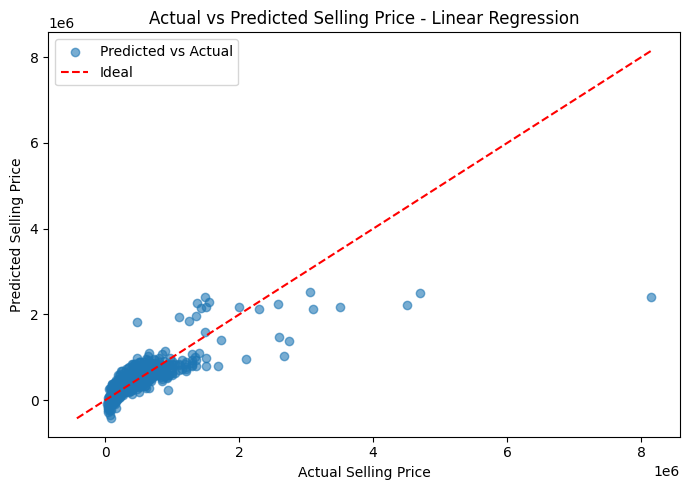

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


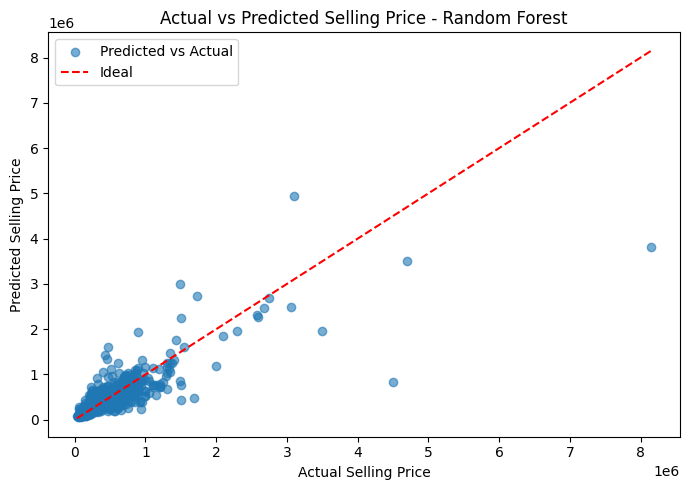

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


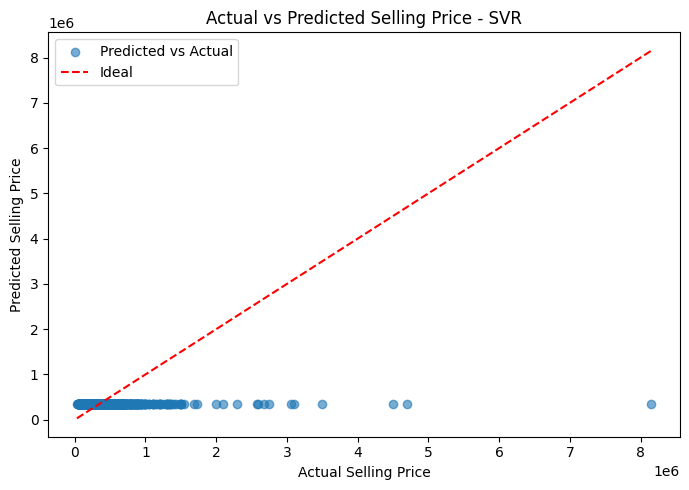

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# plot Actual vs Predicted selling prices for each trained model
# this visually assesses prediction accuracy and model performance
for name, model in models.items():
    # fit the model on training data
    model.fit(x_train, y_train)

    # predict selling prices on the test set
    y_pred = model.predict(x_test)

    # scatter plot: Actual vs Predicted
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')

    # add reference line y = x (perfect prediction)
    min_val = min(np.min(y_test), np.min(y_pred))
    max_val = max(np.max(y_test), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal')

    plt.title(f'Actual vs Predicted Selling Price - {name}')
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.legend()
    plt.tight_layout()

    # save the plot in jupyter
    plt.savefig(f'actual_vs_predicted_selling_{name}.png', dpi=300, bbox_inches='tight')
    
    plt.show()

    
    

## Residual Distribution for Regression Models (one plot per model)
### Residuals = Actual - Predicted

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


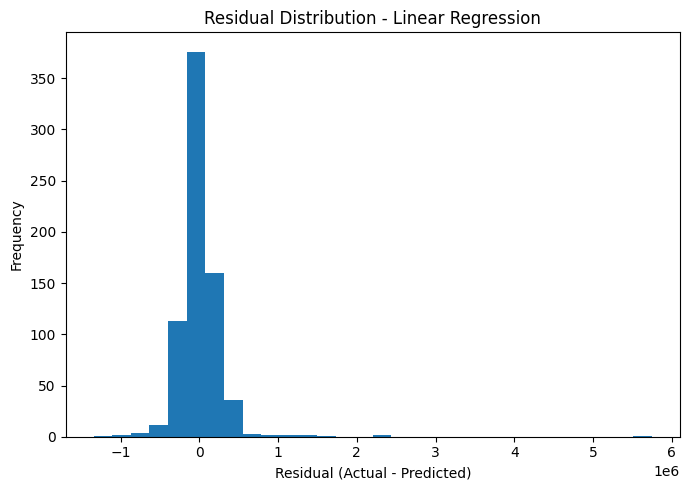

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


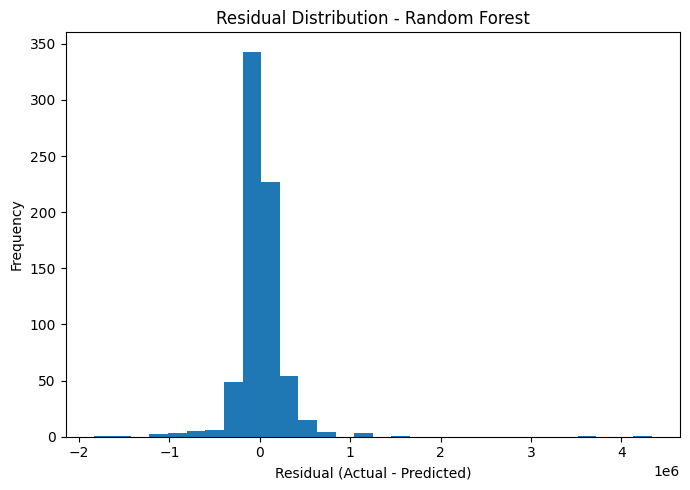

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


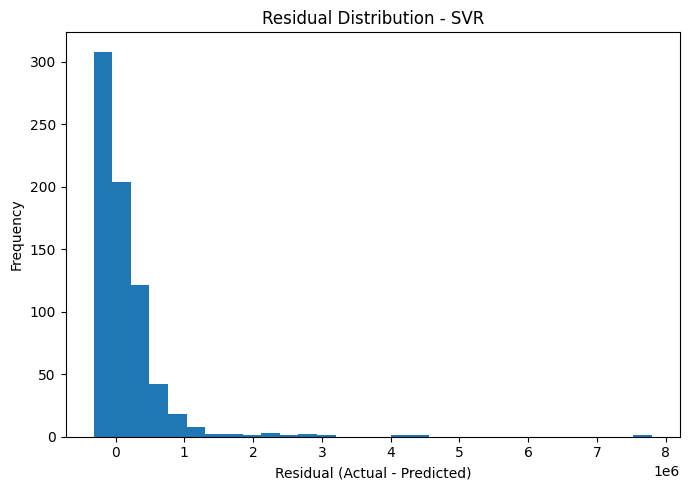

In [69]:
import numpy as np
import matplotlib.pyplot as plt

for name, model in models.items():
    # fit on training data
    model.fit(x_train, y_train)

    # predict on test data
    y_pred = model.predict(x_test)

    # Residuals
    residuals = y_test - y_pred

    # plot: Residual distribution
    plt.figure(figsize=(7,5))
    plt.hist(residuals, bins=30)

    plt.title(f'Residual Distribution - {name}')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.tight_layout()

    # saving all three plots
    plt.savefig(f'Residual_Distribution_{name}.png', dpi=300, bbox_inches='tight')
    
    plt.show()

## Residuals vs Predicted (bias/heteroscedasticity check)

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


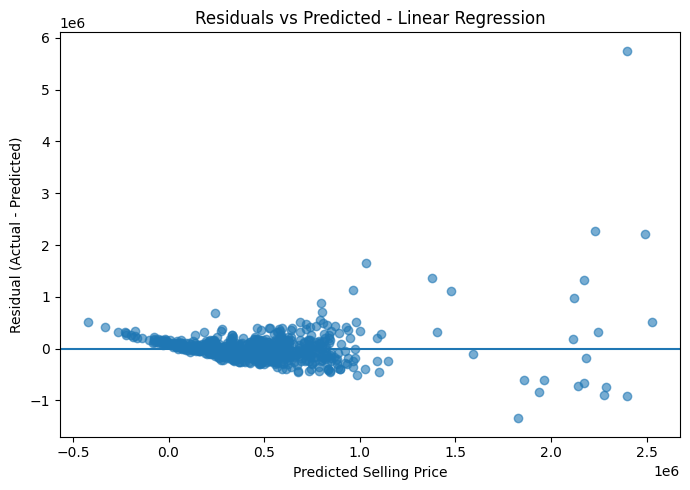

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


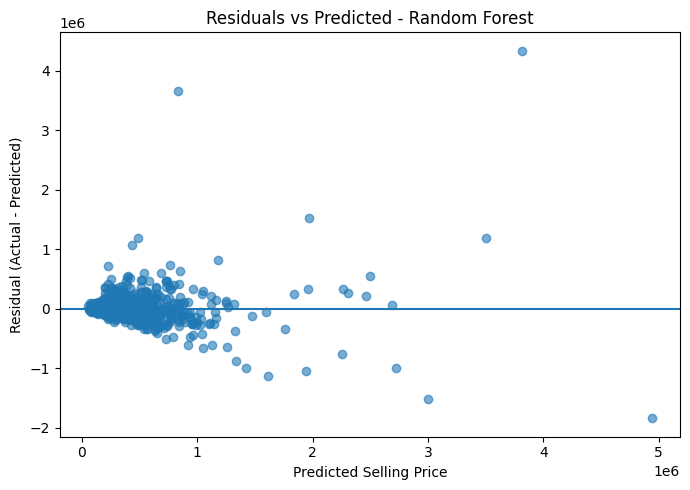

C:\Users\AsH-Ok ALe\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


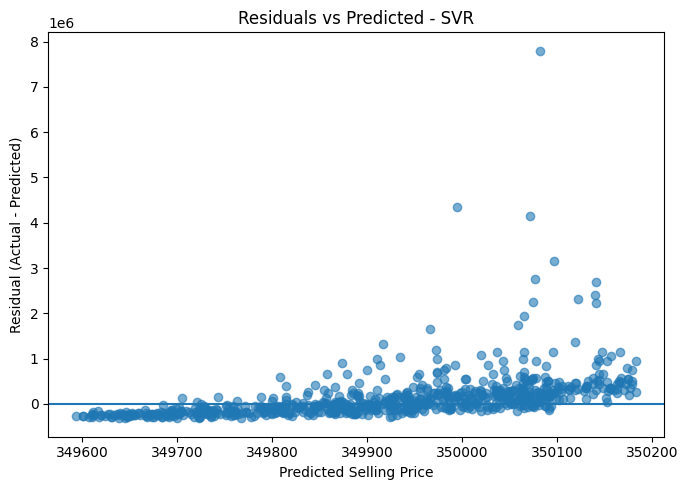

In [70]:
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(7,5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0)

    plt.title(f'Residuals vs Predicted - {name}')
    plt.xlabel('Predicted Selling Price')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.tight_layout()

    # save all three plots
    plt.savefig(f'Residuals_vs_predicted_{name}.png', dpi=300, bbox_inches='tight')
    
    plt.show()